In [6]:
import pandas as pd
import numpy as np
import os

data_path = r"E:\DeepLearning\datasets" 
train_df = pd.read_csv(os.path.join(data_path, "train.csv")) 
images_path = os.path.join(data_path, "images")



In [7]:
print(train_df.head())

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0


In [8]:
print(train_df.shape)

(1821, 5)


In [9]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB
None


In [10]:
print(train_df.isnull().sum())

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64


In [11]:
train_df['label'] = train_df[['healthy','multiple_diseases','rust','scab']].idxmax(axis=1)

print(train_df[['image_id','label']].head())


  image_id              label
0  Train_0               scab
1  Train_1  multiple_diseases
2  Train_2            healthy
3  Train_3               rust
4  Train_4            healthy


In [12]:
print(train_df.columns)

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab', 'label'], dtype='object')


In [16]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


DATASET_DIR = r"E:\DeepLearning\datasets"
IMG_DIR = os.path.join(DATASET_DIR, "images")
TRAIN_CSV = os.path.join(DATASET_DIR, "train.csv")

train_df = pd.read_csv(TRAIN_CSV)

train_df["path"] = train_df["image_id"].apply(lambda x: os.path.join(IMG_DIR, f"{x}.jpg"))

label_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col=label_cols,      
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",     
    subset="training"
)

val_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col=label_cols,
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    subset="validation"
)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  #################################
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Lưu model
model.save("plant_disease_cnn.h5")


Found 1457 validated image filenames.
Found 364 validated image filenames.


C:\Users\hilda\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,740 (237.27 KB)

 Trainable params: 60,740 (237.27 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\hilda\anaconda3\envs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3281 - loss: 1.3049 - val_accuracy: 0.3187 - val_loss: 1.2633
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3301 - loss: 1.2618 - val_accuracy: 0.3187 - val_loss: 1.2514
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3342 - loss: 1.2543 - val_accuracy: 0.3681 - val_loss: 1.2315
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3706 - loss: 1.2371 - val_accuracy: 0.3874 - val_loss: 1.2215
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3590 - loss: 1.2303 - val_accuracy: 0.3681 - val_loss: 1.2310
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3741 - loss: 1.2247 - val_accuracy: 0.4231 - val_loss: 1.1927
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3850 - loss: 1.2218 - val_accuracy: 0.4698 - val_loss: 1.2050
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4097 - loss: 1.2143 - val_accuracy: 0.4231 - val_loss:

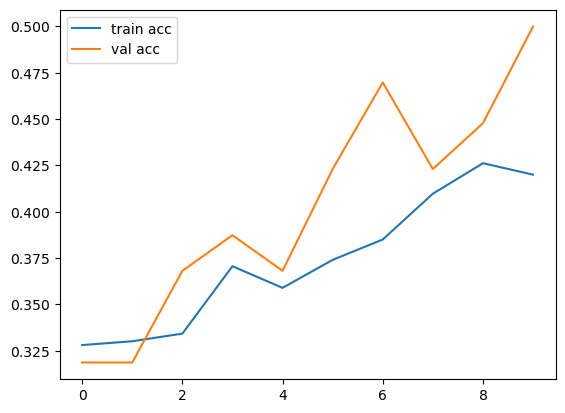

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load model
model = load_model("plant_disease_cnn.h5")

# Load 1 ảnh để predict
img_path = "E:/DeepLearning/datasets/images/Train_10.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
print("Pred:", pred)
print("Class:", np.argmax(pred))  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Pred: [[0.24452037 0.04892835 0.386378   0.3201732 ]]
Class: 2


Ảnh được chọn: E:\DeepLearning\datasets\images\Test_926.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


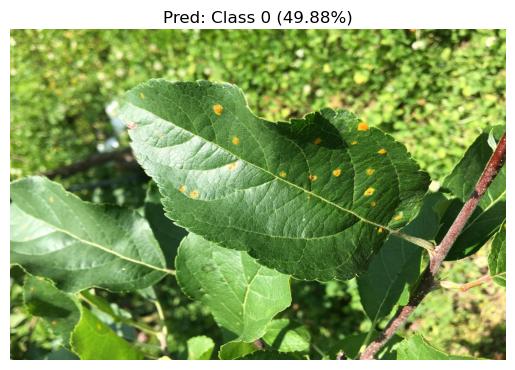

In [30]:
import random, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

TEST_DIR = r"E:\DeepLearning\datasets\images"

random_image = random.choice(os.listdir(TEST_DIR))
img_path = os.path.join(TEST_DIR, random_image)

print("Ảnh được chọn:", img_path)

model = tf.keras.models.load_model("plant_disease_cnn.h5")

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
confidence = np.max(pred)

class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]

plt.imshow(image.load_img(img_path))
plt.title(f"Pred: {class_names[class_idx]} ({confidence*100:.2f}%)")
plt.axis("off")
plt.show()